In [5]:
!pip -q install pandas numpy matplotlib seaborn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_context("notebook")

In [6]:
df = pd.read_csv('Loan_default.csv')  # change path if needed

print(f"Shape: {df.shape}")
display(df.head())

Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
print("\n--- INFO ---")
print(df.info())

print("\n--- Missing Values (count & %) ---")
missing_count = df.isna().sum()
missing_pct = (missing_count / len(df)) * 100
missing_table = pd.DataFrame({"missing_count": missing_count, "missing_%": missing_pct.round(2)})
display(missing_table.sort_values("missing_%", ascending=False))


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 

,missing_count,missing_%
LoanID,0,0.0
Age,0,0.0
Income,0,0.0
LoanAmount,0,0.0
CreditScore,0,0.0
MonthsEmployed,0,0.0
NumCreditLines,0,0.0
InterestRate,0,0.0
LoanTerm,0,0.0
DTIRatio,0,0.0


In [9]:
id_like = [c for c in df.columns if c.lower() in {"id", "loanid", "customerid"}]
target_like = [c for c in df.columns if c.lower() in {"target", "default", "label"}]

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for c in id_like:
    if c in numeric_cols:
        numeric_cols.remove(c)

print("\n--- Column Groups ---")
print("ID-like columns:", id_like)
print("Target-like columns:", target_like)
print("Numeric columns:", numeric_cols[:10], "..." if len(numeric_cols) > 10 else "")
print("Categorical columns:", categorical_cols[:10], "..." if len(categorical_cols) > 10 else "")


--- Column Groups ---
ID-like columns: ['LoanID']
Target-like columns: ['Default']
Numeric columns: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'] 
Categorical columns: ['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'] 


In [10]:
print("\n--- DESCRIPTIVE STATS (numeric) ---")
desc = df[numeric_cols].describe().T
desc["median"] = df[numeric_cols].median()
desc["skewness"] = df[numeric_cols].skew(numeric_only=True)
display(desc)


--- DESCRIPTIVE STATS (numeric) ---


,count,mean,std,min,25%,50%,75%,max,median,skewness
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0,43.00,0.000698
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0,82466.00,-0.000381
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0,127556.00,-0.001827
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0,574.00,0.004688
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0,60.00,-0.002142
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0,2.00,-0.000278
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0,13.46,0.004608
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0,36.00,-0.002178
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9,0.50,-0.001499
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0,0.00,2.396377


In [11]:
print("\n--- MODE (first mode per column) ---")
mode_series = {}
for col in df.columns:
    try:
        m = df[col].mode(dropna=True)
        mode_series[col] = None if m.empty else m.iloc[0]
    except Exception:
        mode_series[col] = None
display(pd.DataFrame(mode_series, index=["mode"]).T)



--- MODE (first mode per column) ---


,mode
LoanID,0003HW9UAA
Age,55
Income,69492
LoanAmount,95419
CreditScore,630
MonthsEmployed,56
NumCreditLines,2
InterestRate,14.92
LoanTerm,48
DTIRatio,0.67



Plotting distributions for 10 numeric features: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']


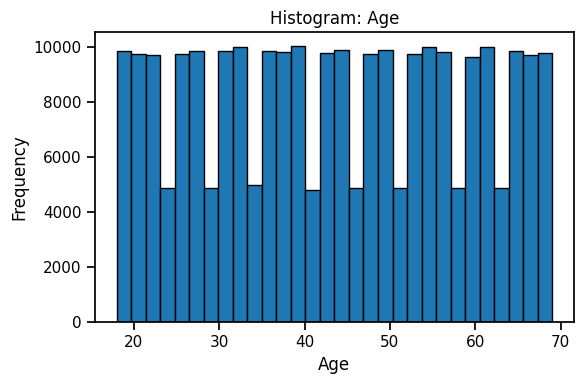

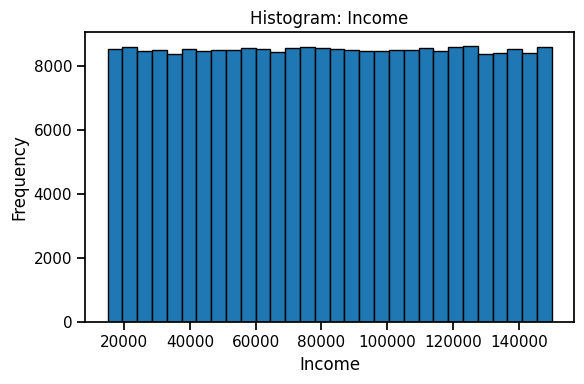

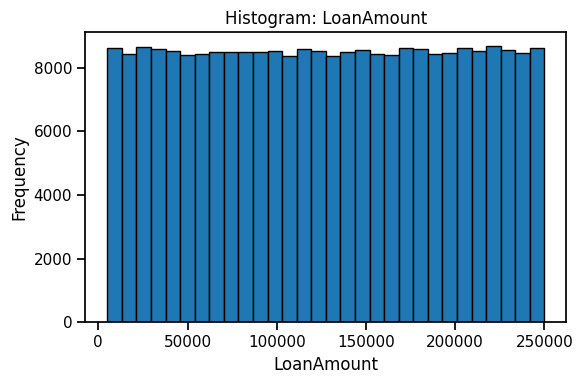

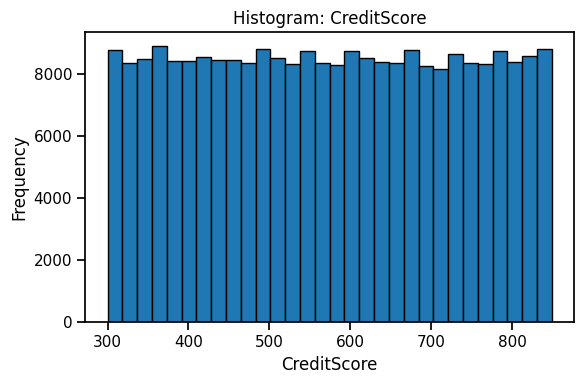

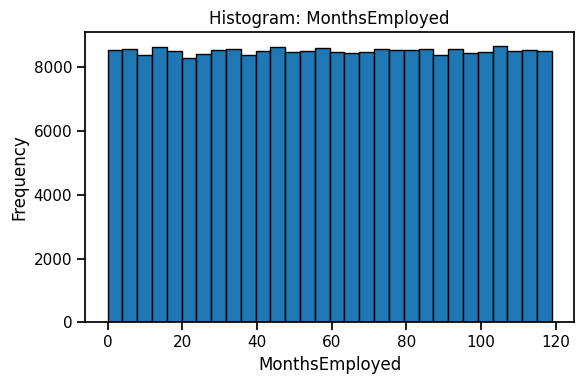

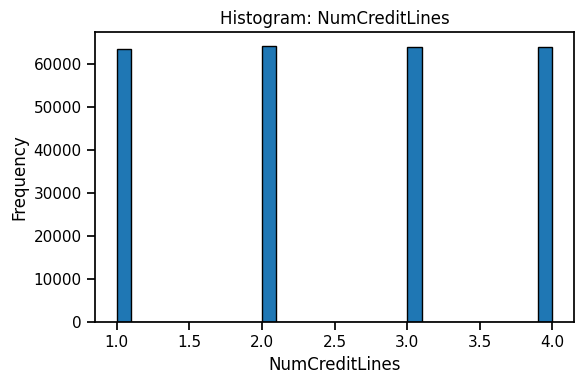

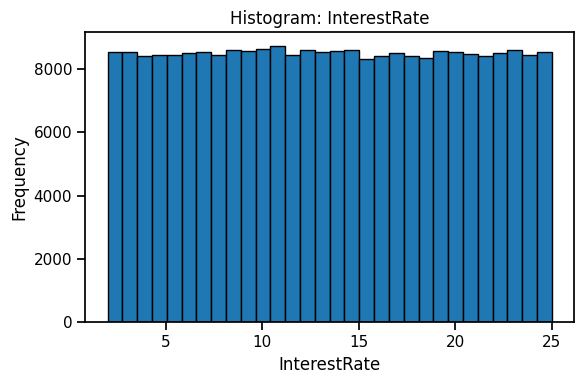

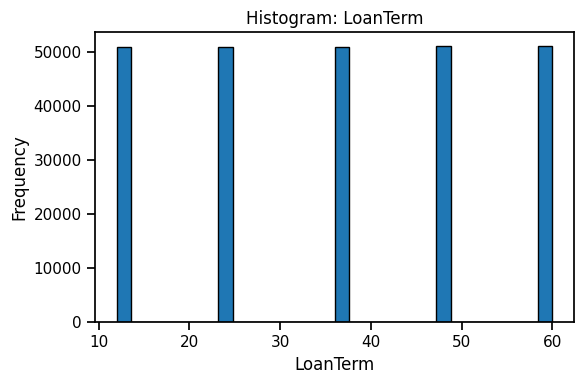

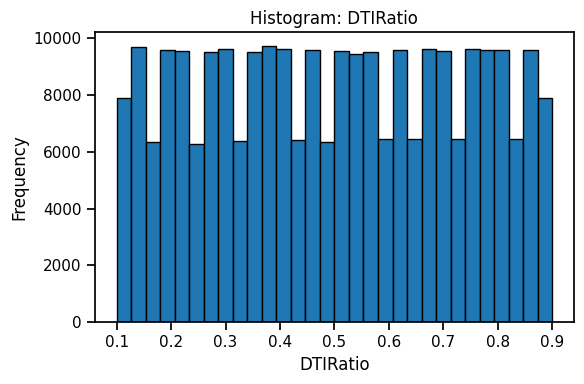

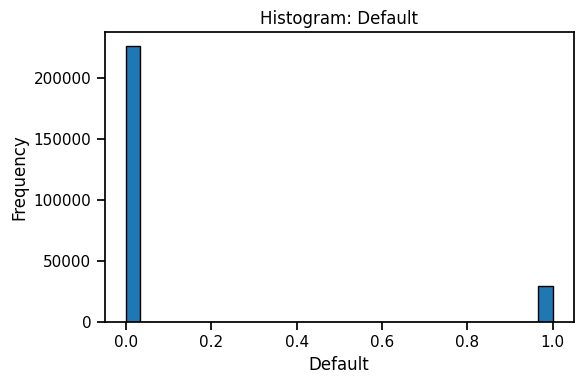

In [12]:
N_SHOW = min(12, len(numeric_cols))
cols_to_plot = numeric_cols[:N_SHOW]
print(f"\nPlotting distributions for {len(cols_to_plot)} numeric features: {cols_to_plot}")

# Histograms
for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"Histogram: {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.tight_layout(); plt.show()


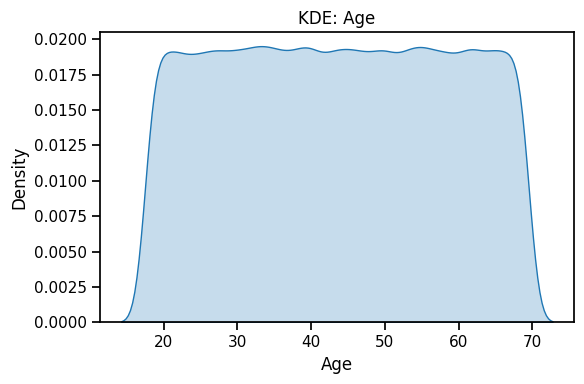

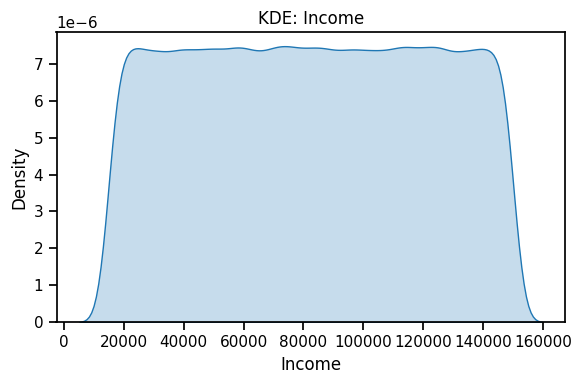

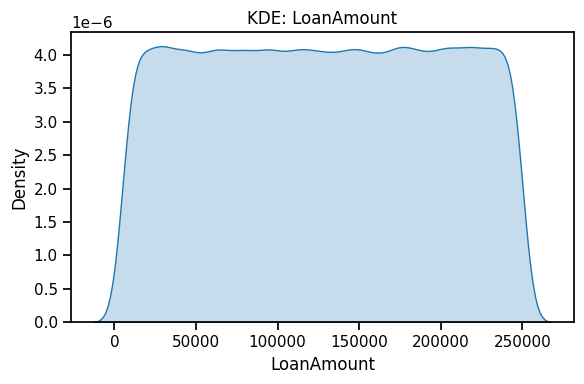

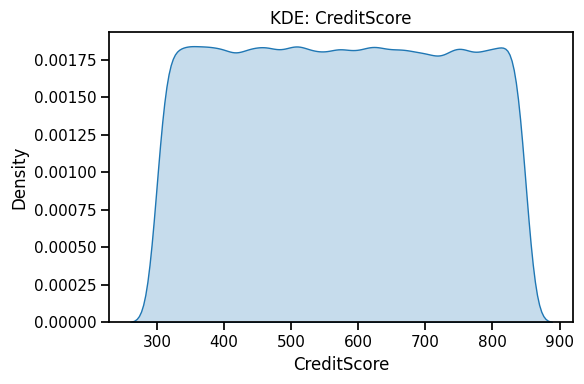

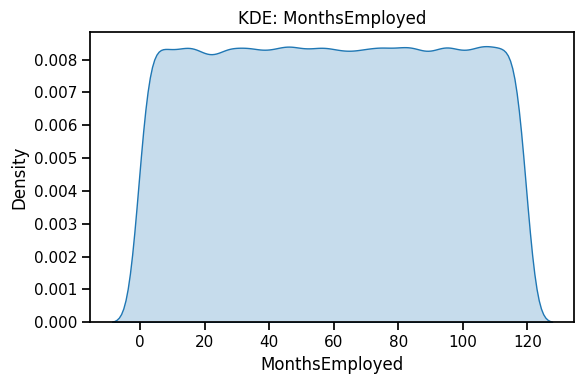

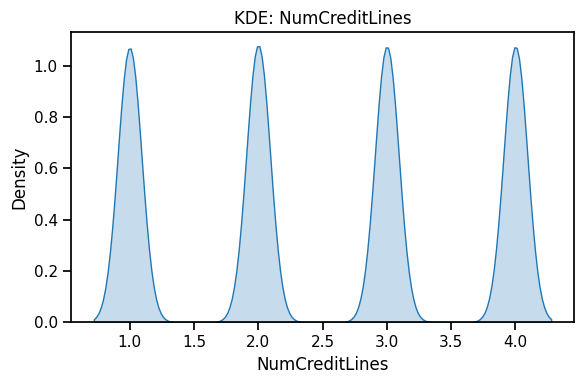

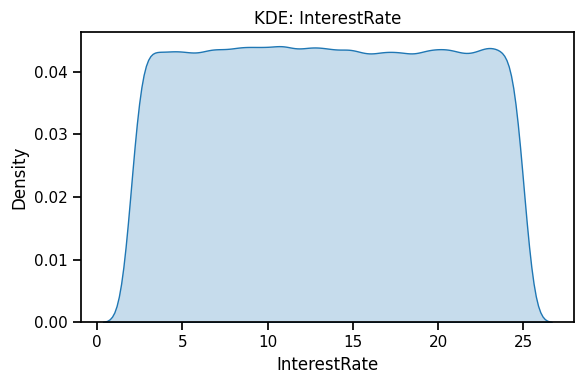

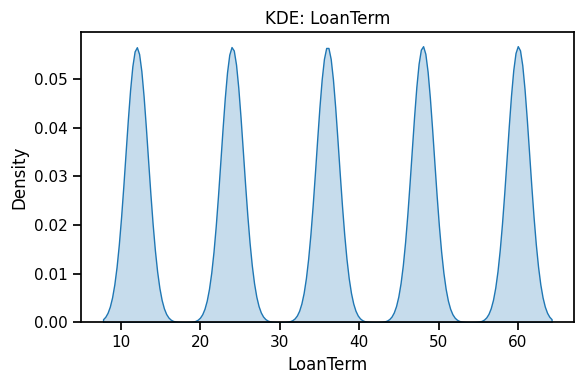

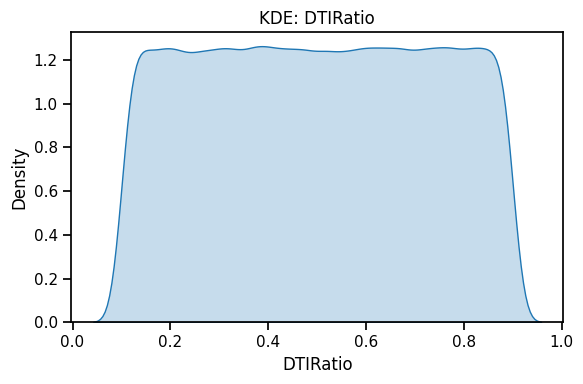

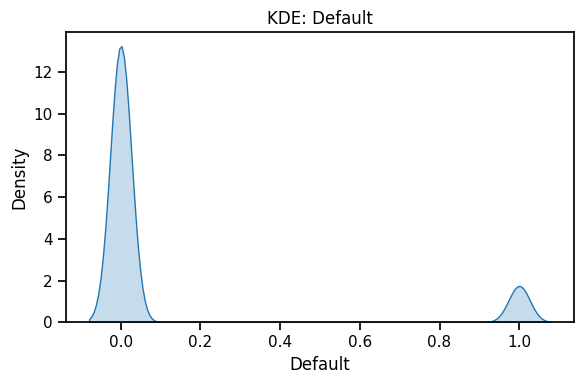

In [13]:
# KDE plots
for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, fill=True, common_norm=False)
    plt.title(f"KDE: {col}")
    plt.xlabel(col); plt.ylabel("Density")
    plt.tight_layout(); plt.show()


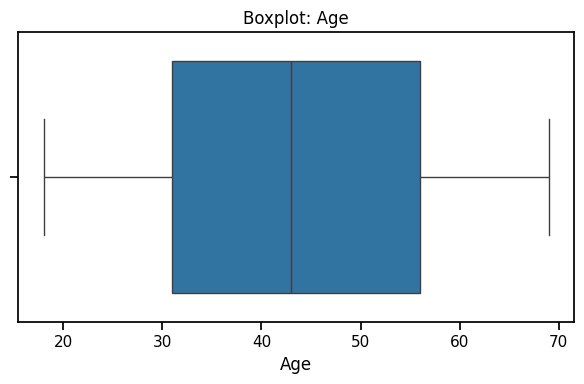

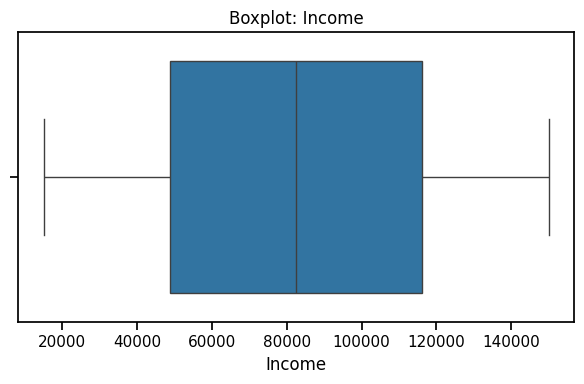

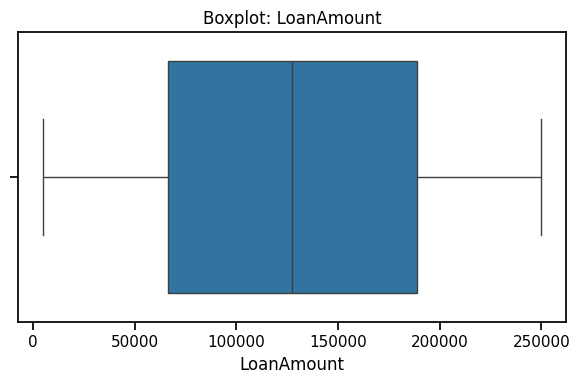

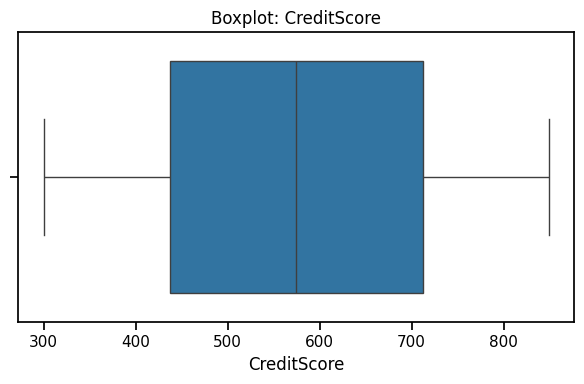

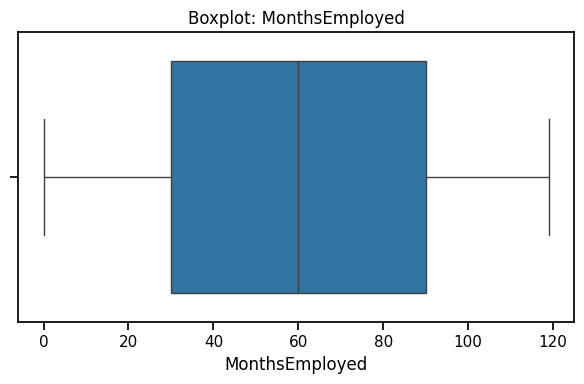

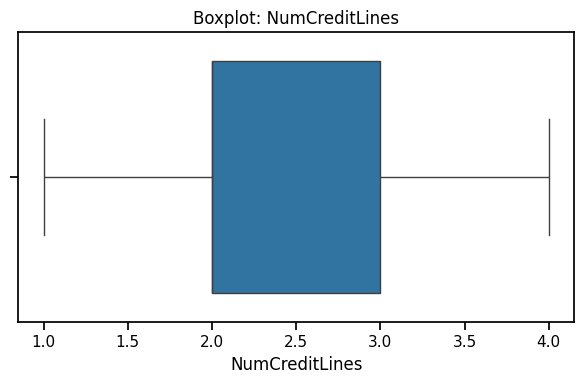

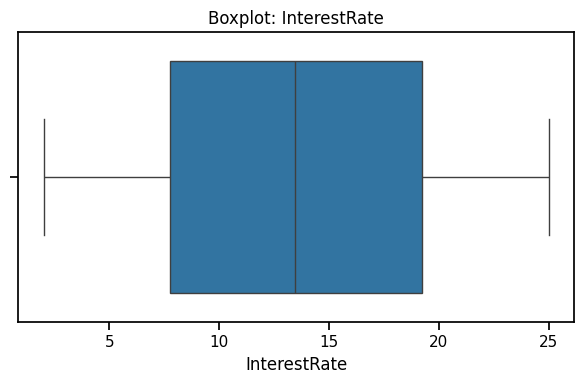

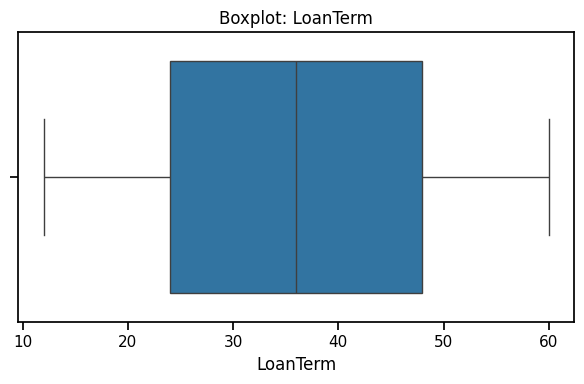

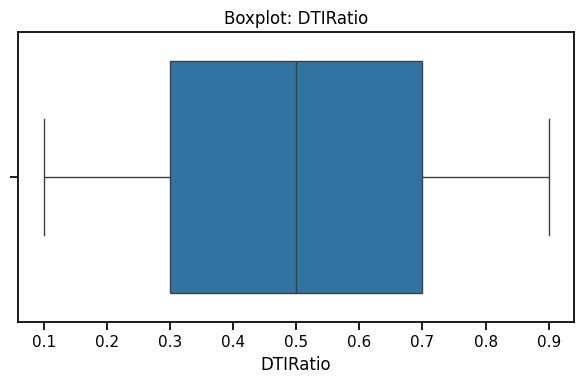

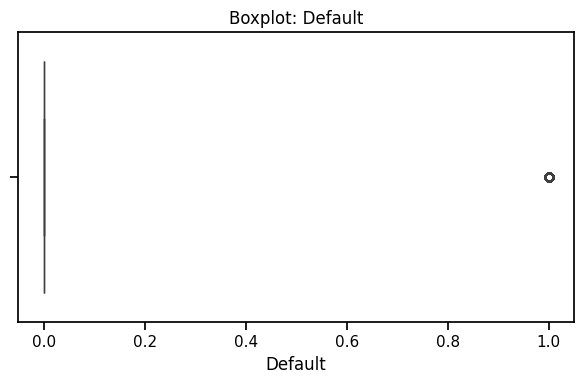

In [14]:
for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"Boxplot: {col}")
    plt.tight_layout(); plt.show()

In [15]:
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr(numeric_only=True)
    cov = df[numeric_cols].cov(numeric_only=True)

    print("\n--- Correlation (top pairs by absolute value) ---")
    corr_pairs = (
        corr.where(~np.eye(corr.shape[0], dtype=bool))  # mask diagonal
            .stack()
            .rename("corr")
            .abs()
            .sort_values(ascending=False)
    )
    display(corr_pairs.head(20))


--- Correlation (top pairs by absolute value) ---


Age             Default           0.167783
Default         Age               0.167783
InterestRate    Default           0.131273
Default         InterestRate      0.131273
                Income            0.099119
Income          Default           0.099119
Default         MonthsEmployed    0.097374
MonthsEmployed  Default           0.097374
LoanAmount      Default           0.086659
Default         LoanAmount        0.086659
                CreditScore       0.034166
CreditScore     Default           0.034166
NumCreditLines  Default           0.028330
Default         NumCreditLines    0.028330
DTIRatio        Default           0.019236
Default         DTIRatio          0.019236
Age             DTIRatio          0.004689
DTIRatio        Age               0.004689
MonthsEmployed  LoanAmount        0.002817
LoanAmount      MonthsEmployed    0.002817
Name: corr, dtype: float64

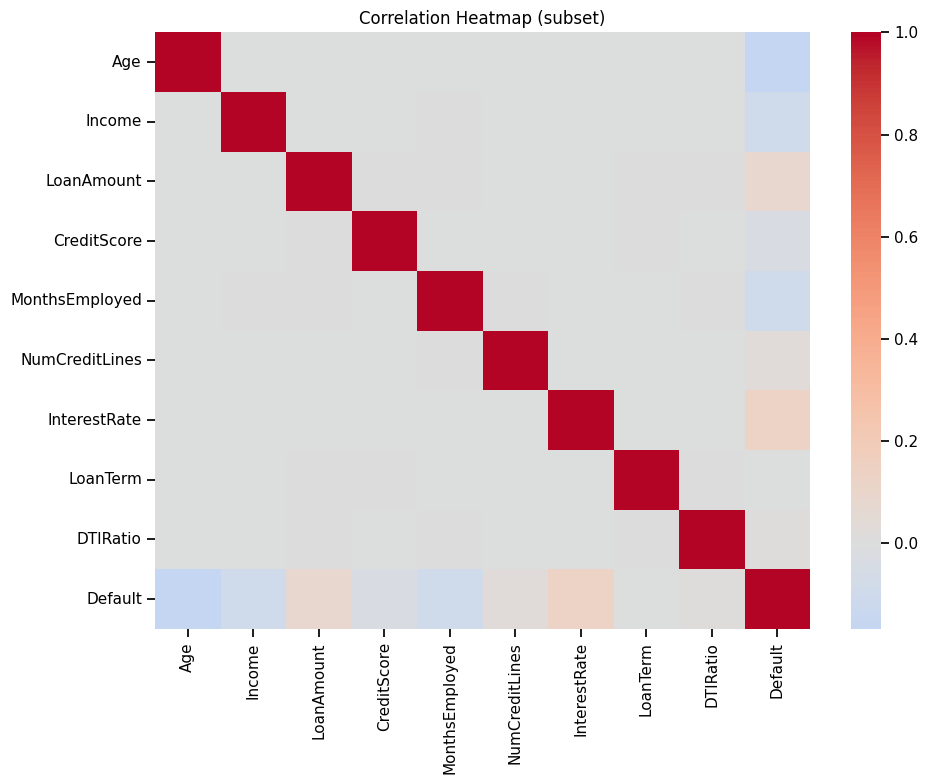


--- Covariance (preview) ---


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,224.707847,-7.266333e+02,-2.349755e+03,-1.305749,-0.177287,-0.014899,-0.112154,0.066988,-0.016232,-0.805790
Income,-726.633252,1.518116e+09,-2.388444e+06,-8856.434459,3610.576524,-87.758937,-595.610079,-659.983685,1.848896,-1237.302790
LoanAmount,-2349.755323,-2.388444e+06,5.018406e+09,14197.937653,6912.970233,62.861514,-1077.124510,3050.937995,18.360894,1966.807516
CreditScore,-1.305749,-8.856434e+03,1.419794e+04,25250.438819,3.373593,0.002847,0.459933,3.048022,-0.038134,-1.739399
MonthsEmployed,-0.177287,3.610577e+03,6.912970e+03,3.373593,1200.163476,0.049034,0.021973,-0.685499,0.014117,-1.080754
NumCreditLines,-0.014899,-8.775894e+01,6.286151e+01,0.002847,0.049034,1.247728,-0.002199,-0.004280,-0.000151,0.010138
InterestRate,-0.112154,-5.956101e+02,-1.077125e+03,0.459933,0.021973,-0.002199,44.042377,0.100454,0.000882,0.279110
LoanTerm,0.066988,-6.599837e+02,3.050938e+03,3.048022,-0.685499,-0.004280,0.100454,287.958162,0.008907,0.002961
DTIRatio,-0.016232,1.848896e+00,1.836089e+01,-0.038134,0.014117,-0.000151,0.000882,0.008907,0.053322,0.001423
Default,-0.805790,-1.237303e+03,1.966808e+03,-1.739399,-1.080754,0.010138,0.279110,0.002961,0.001423,0.102643


In [17]:
if len(numeric_cols) >= 2:
    cols_for_heatmap = numeric_cols[:min(15, len(numeric_cols))]
    plt.figure(figsize=(10,8))
    sns.heatmap(df[cols_for_heatmap].corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap (subset)")
    plt.tight_layout(); plt.show()

    print("\n--- Covariance (preview) ---")
    display(cov.iloc[:10, :10])
else:
    print("\nNot enough numeric columns for correlation/covariance.")

In [18]:
def iqr_outlier_counts(series: pd.Series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (series < lower) | (series > upper)
    return {
        "Q1": q1, "Q3": q3, "IQR": iqr,
        "lower_bound": lower, "upper_bound": upper,
        "outlier_count": int(mask.sum()),
        "outlier_%": float(mask.mean() * 100)
    }

outlier_summary = {}
for col in numeric_cols:
    s = df[col].dropna()
    if s.empty:
        continue
    outlier_summary[col] = iqr_outlier_counts(s)

outlier_df = pd.DataFrame(outlier_summary).T.sort_values("outlier_%", ascending=False)
print("\n--- Outlier Summary (IQR) ---")
display(outlier_df)


--- Outlier Summary (IQR) ---


,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count,outlier_%
Default,0.00,0.00,0.00,0.00,0.00,29653.0,11.612825
Age,31.00,56.00,25.00,-6.50,93.50,0.0,0.000000
Income,48825.50,116219.00,67393.50,-52264.75,217309.25,0.0,0.000000
LoanAmount,66156.00,188985.00,122829.00,-118087.50,373228.50,0.0,0.000000
MonthsEmployed,30.00,90.00,60.00,-60.00,180.00,0.0,0.000000
CreditScore,437.00,712.00,275.00,24.50,1124.50,0.0,0.000000
NumCreditLines,2.00,3.00,1.00,0.50,4.50,0.0,0.000000
InterestRate,7.77,19.25,11.48,-9.45,36.47,0.0,0.000000
LoanTerm,24.00,48.00,24.00,-12.00,84.00,0.0,0.000000
DTIRatio,0.30,0.70,0.40,-0.30,1.30,0.0,0.000000


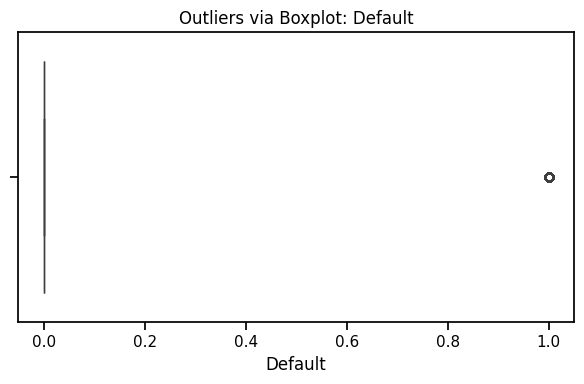

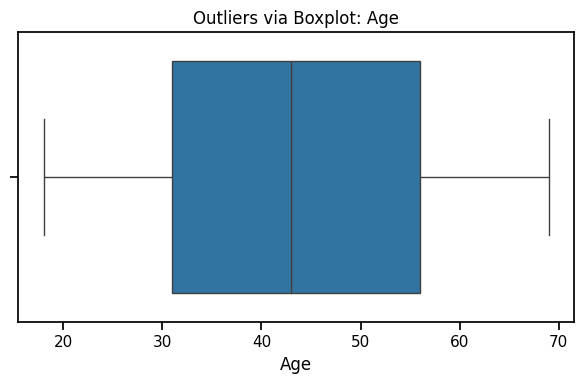

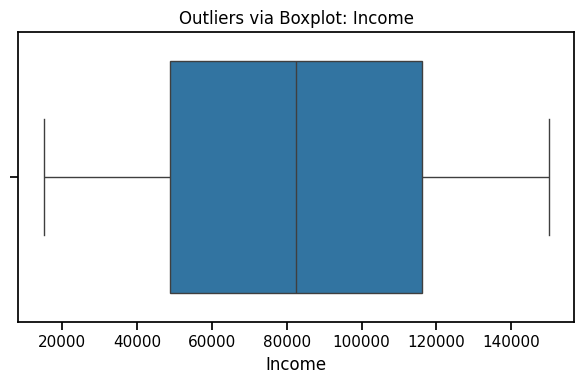

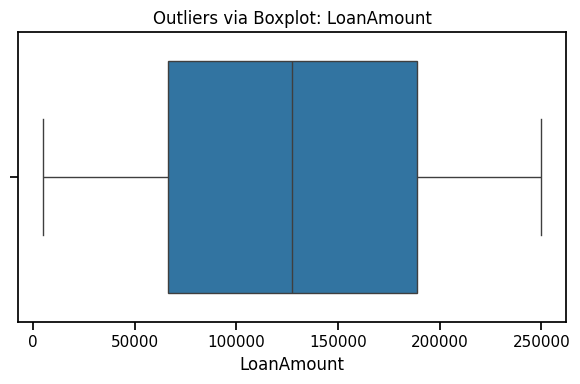

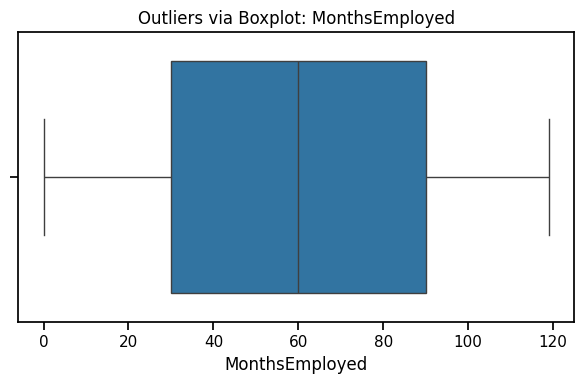

In [19]:
top_outlier_cols = outlier_df.head(5).index.tolist()
for col in top_outlier_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"Outliers via Boxplot: {col}")
    plt.tight_layout(); plt.show()

In [20]:
target = target_like[0] if target_like else None
if (target is None) and ("Default" in df.columns):
    target = "Default"

print("\nTarget column detected:", target)


Target column detected: Default


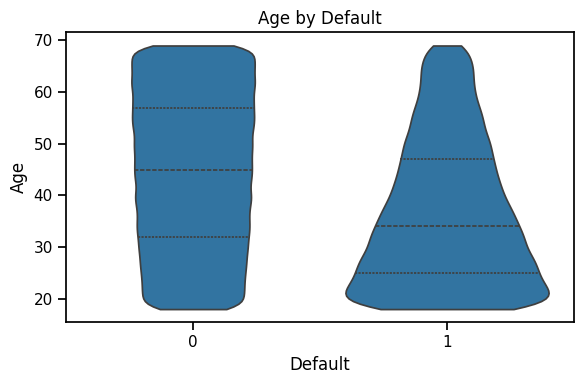

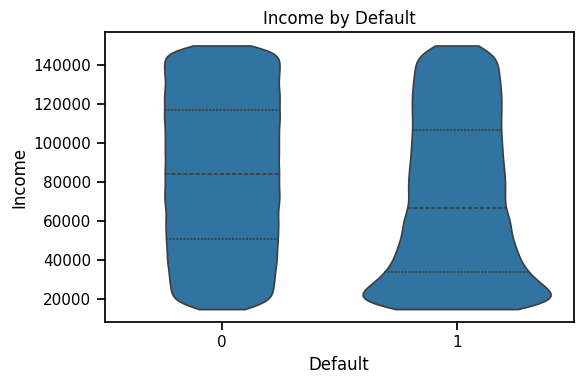

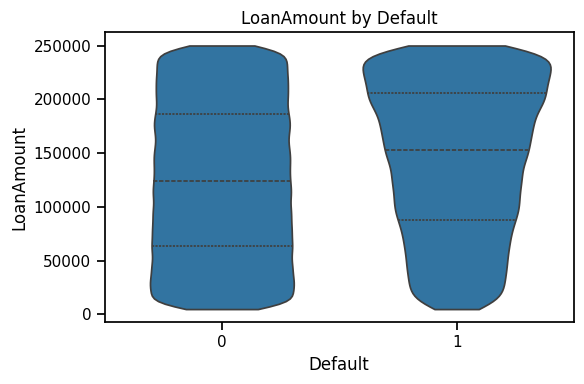

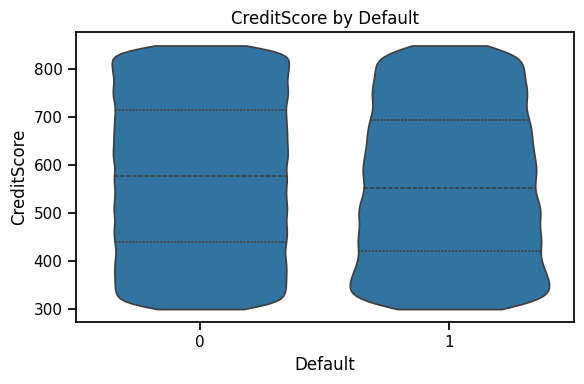

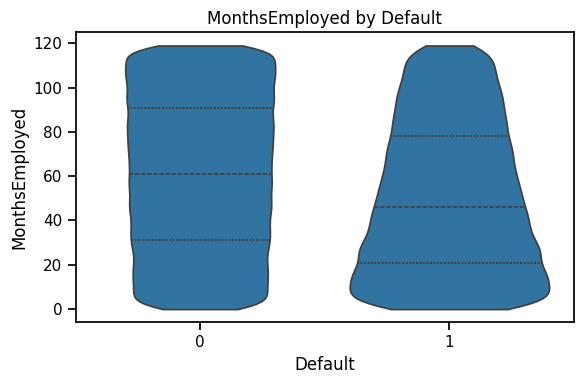

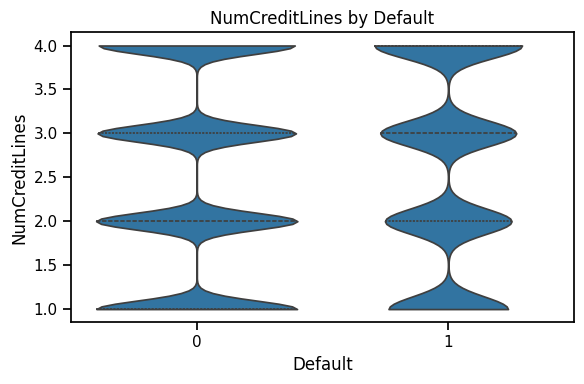

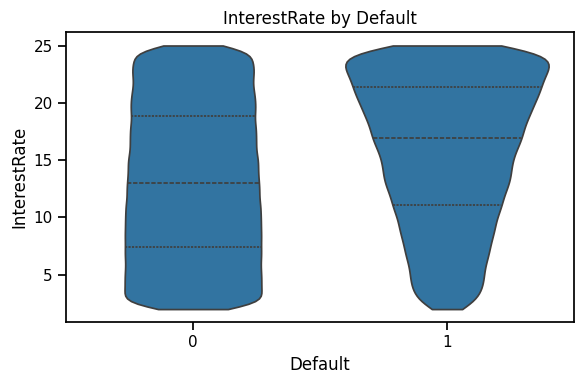

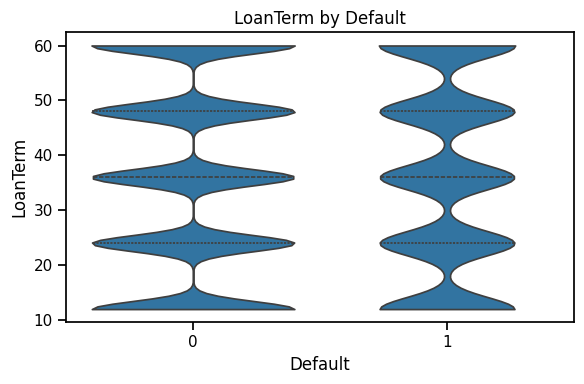

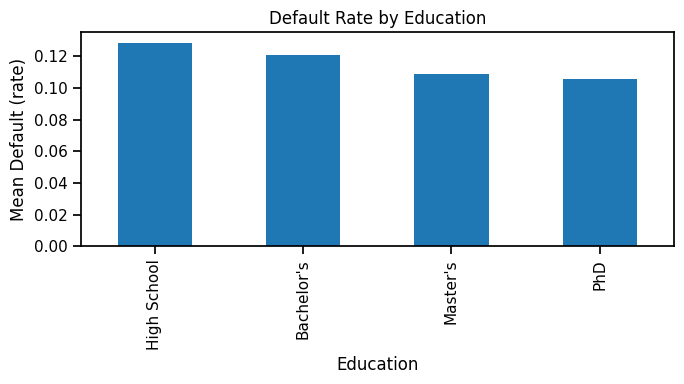

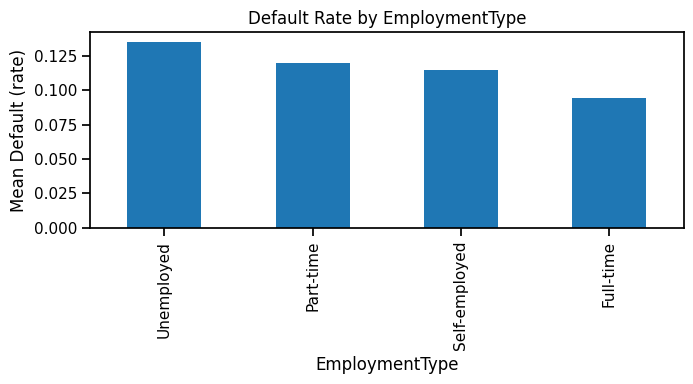

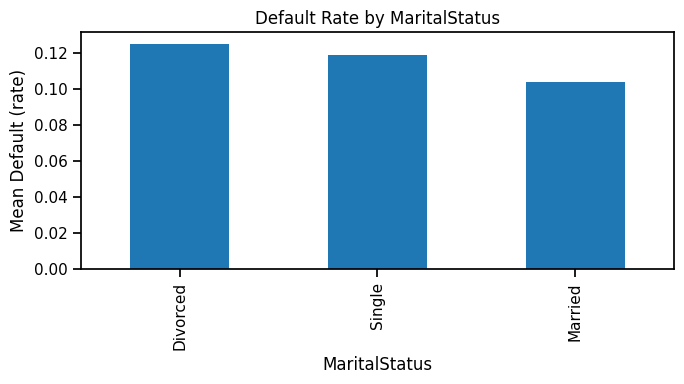

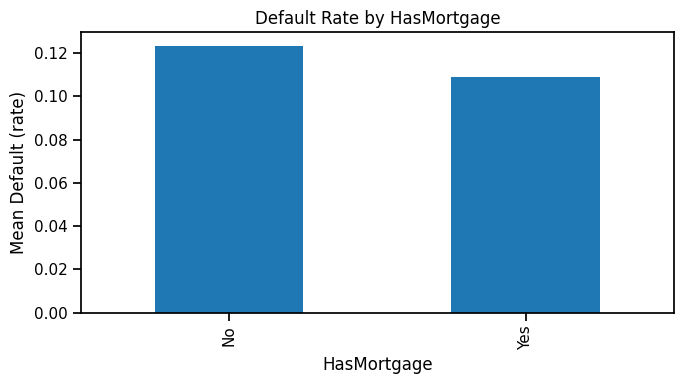

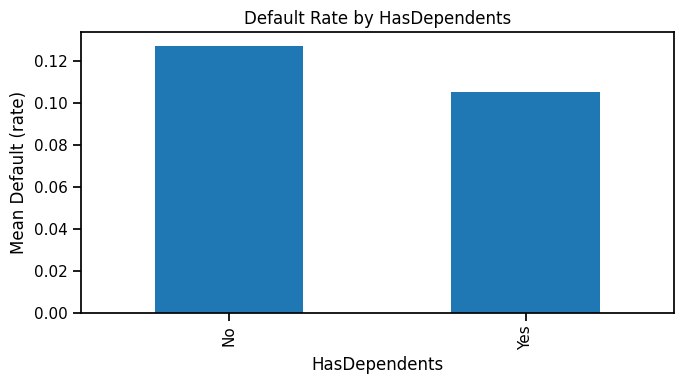

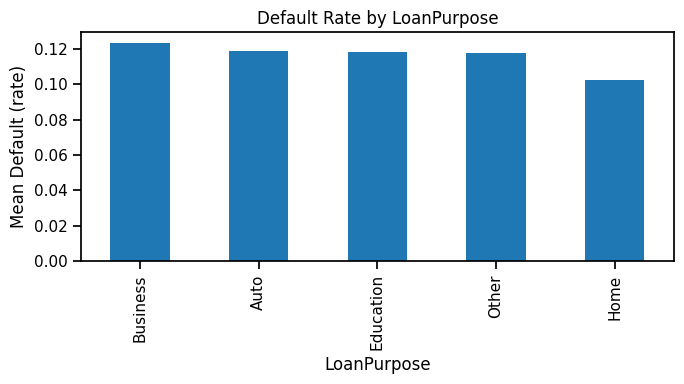

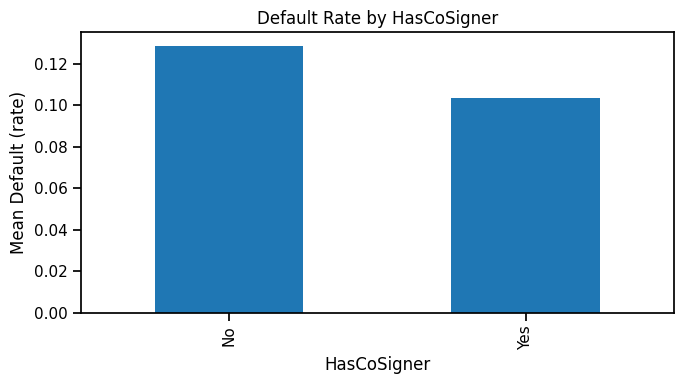


--- Missing Value Insights ---
No missing values detected in the dataset.

✅ EDA complete.


In [22]:
if target is not None and df[target].nunique(dropna=True) <= 5:
    # For numeric columns: violin plots or boxplots by target
    subset_cols = numeric_cols[:min(8, len(numeric_cols))]
    for col in subset_cols:
        plt.figure(figsize=(6,4))
        sns.violinplot(data=df, x=target, y=col, cut=0, inner="quartile")
        plt.title(f"{col} by {target}")
        plt.tight_layout(); plt.show()

    # For categorical columns: default rate by category (top categories only)
    for col in categorical_cols[:8]:
        if df[col].nunique(dropna=True) > 30:
            continue  # skip high-cardinality
        rate = df.groupby(col)[target].mean().sort_values(ascending=False)
        plt.figure(figsize=(7,4))
        rate.plot(kind="bar")
        plt.ylabel(f"Mean {target} (rate)")
        plt.title(f"{target} Rate by {col}")
        plt.tight_layout(); plt.show()

# --- 8) Missing Value Insights
print("\n--- Missing Value Insights ---")
if missing_count.sum() == 0:
    print("No missing values detected in the dataset.")
else:
    # Simple imputation suggestions preview (not applied)
    mv_insights = {}
    for col in df.columns:
        if missing_count[col] > 0:
            if col in numeric_cols:
                mv_insights[col] = {
                    "type": "numeric",
                    "suggested_imputation": "median",
                    "missing_count": int(missing_count[col])
                }
            else:
                mv_insights[col] = {
                    "type": "categorical",
                    "suggested_imputation": "mode",
                    "missing_count": int(missing_count[col])
                }
    display(pd.DataFrame(mv_insights).T.sort_values("missing_count", ascending=False))

print("\n✅ EDA complete.")